<font size="+4">Alexa, how many people have your name?</font>

***Work in Progress***

# Introduction

## Datasets

### Amazon Alexa
- **Release dates [[1](#references)]:**</br>
The release dates of Amazon Alexa for the different countries are covered by a table on the Wikipedia. I manually looked up the dates for the individual countries.

### Baby Names
- **England and Wales [[2](#references)] [[3](#references)]:**<br>
The GB Office for National Statistics provided their data in two different subsets: The first dataset covers the years 1907 to 1994, but contains only the top 100 names and only their sex and rank, not their count. The second dataset covers from 1996 to 2018 is more complete, covering much more names (with count >= 3) and provides gender, rank and counts. I wasn't able to identify datasets for the missing year 1995.

- **United States [[4](#references)]:**<br>
This dataset provided by the US Social Security Administration (SSA) seems quite complete: It contains information on name, sex, count and rank covers for every years from 1880 to 2018. The fact that it contains names with single occurcance (count=1) indicates, that *all* names are included.

- **Switzerland [[5](#references)]:**<br>
Provided by the Swizz Buro for Statistics, this dataset covers counts, ranks and sex for all names with at least 6 occurances in the year 2018, and reaches back to the year 1998. 

- **New Zealand [[6](#references)]:**<br>
Covering the years from 1900 to 2019, this dataset by the Department of Internal Affairs and includes all names with at least 10 occurances together with their sex and count from 1900 to 2019. 

- **Austria [[7](#references)]:**<br>
This dataset from Open Data Austria contains count, year and sex for every names. Sadly it goes back only to 2010 and the latest entries are from 2016, so it turned out to be not very useful right now.

## References

[1] Wikipedia contributors (2019): **Amazon Alexa**. In *Wikipedia - The Free Encyclopedia*. Retrieved Dec 28, 2019, from <https://en.wikipedia.org/w/index.php?title=Amazon_Alexa&oldid=932280905>

[2] Office for National Statistics (2019): **Baby names in England and Wales: 1996-2018**. Retrieved Dec 28, 2019, from <https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/datasets/babynamesenglandandwalesbabynamesstatisticsgirls> and <https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/datasets/babynamesenglandandwalesbabynamesstatisticsboys>

[3] Office for National Statistics (2019): **Top 100 baby names in England and Wales: 1907-1994**. Retrieved Dec 28, 2019, from <https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/datasets/babynamesenglandandwalestop100babynameshistoricaldata>

[4] Social Security Administration (2019): **Baby Names from Social Security Card Applications - National Data**. Retrieved Jan 03, 2020, from https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data

[5] Schweizer Eidgenossenschaft - Bundesamt für Statistik (2019): **Vornamen der Neugeborenen nach Sprachregion, 1998-2018**. Retrieved Jan 03, 2020, from <https://www.bfs.admin.ch/bfs/de/home/statistiken/bevoelkerung/geburten-todesfaelle/vornamen-neugeborene.assetdetail.9127688.html> and <https://www.bfs.admin.ch/bfs/de/home/statistiken/bevoelkerung/geburten-todesfaelle/vornamen-neugeborene.assetdetail.9127668.html>

[6] Department of Internal Affairs - New Zealand (2020): **Baby name counts over time**. Retrieved on Jan 10, 2020, from <https://catalogue.data.govt.nz/dataset/baby-name-popularity-over-time/resource/0b0b326c-d720-480f-8f86-bf2d221c7d3f>

[7] Statistik Austria (2018): **Katalog Vornamen**. Retrieved on Jan 10, 2020, from <https://www.data.gv.at/katalog/dataset/stat_vornamen>

**Other possible Sources:**
- https://www.data.gv.at/katalog/dataset/stat_vornamen
- https://data.sa.gov.au/data/Referencesdataset/popular-baby-names
- https://open.alberta.ca/opendata/frequency-and-ranking-of-baby-names-by-year-and-gender

**Assets:**
- https://commons.wikimedia.org/wiki/File:Amazon_Alexa_logo.svg
- https://commons.wikimedia.org/wiki/File:Amazon_Alexa_blue_logo.svg
- https://commons.wikimedia.org/wiki/File:Amazon_echo.png
- https://www.piqsels.com/sv/search?q=amazon+echo
- https://www.piqsels.com/sv/public-domain-photo-jwihl

# Setup

## Imports

In [1]:
# Default
from pathlib import Path
from zipfile import ZipFile
import io
import urllib
import datetime
import sys
import platform
import psutil

# Extra
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt, font_manager, rcParams
from PIL import Image,ImageDraw, ImageFont

pd.plotting.register_matplotlib_converters()
sns.set(style="darkgrid")

## System information

Sometimes useful for reproducability:

In [2]:
print("---- System information ----")
print(f"OS: {platform.uname().system}, {platform.uname().release}")
print(f"Platform: {platform.uname().machine}")
print("Logical cores:", psutil.cpu_count(logical=True))
print(f"Max Frequency: {psutil.cpu_freq().max:.0f} Mhz")
print(f"Total Memory: {psutil.virtual_memory().total / 1024 / 1024 / 1024:.2F} GB")

print("\n---- Python information ----")
print(f"python: {sys.version.split(' ')[0]}")
print(f"psutil: {psutil.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"matplotlib: {matplotlib.__version__}")

---- System information ----
OS: Linux, 5.3.0-29-generic
Platform: x86_64
Logical cores: 8
Max Frequency: 4000 Mhz
Total Memory: 31.13 GB

---- Python information ----
python: 3.7.3
psutil: 5.6.7
pandas: 0.25.3
numpy: 1.17.3
seaborn: 0.9.0
matplotlib: 3.1.2


## Configuration

In [3]:
DATA_PATH = Path(".") / "data" / "alexa"
ASSETS_PATH = Path(".") / "assets" / "alexa"

# Create, if not existing
DATA_PATH.mkdir(parents=True, exist_ok=True)
ASSETS_PATH.mkdir(parents=True, exist_ok=True)


DATASETS = {
    "US": {
        "description": "United States",
        "url": "https://www.ssa.gov/oact/babynames/names.zip",
        "filename": "names_us.zip",
        "release": datetime.date(2015, 6, 28),
    },
    "AT": {
        "url_prefix": "",
        "url": ["http://data.statistik.gv.at/data/OGDEXT_VORNAMEN_1.csv"],
        "filename": "names_at.zip",
        "release": datetime.date(2016, 10, 26),
    },
    "CA": {
        "description": "Canada (AB)",
        "url_prefix": "",
        "url": ["https://open.alberta.ca/dataset/11245675-b047-49fc-8bd1-cc2ce8314a6d/resource/e8aac308-c754-484c-b446-0c57ed0e8d37/download/baby-names-frequency.xlsx"],
        "filename": "names_ca.zip",
        "release": datetime.date(2017, 12, 5),
    },
    "NZ": {
        "description": "New Zealand",
        "url_prefix": "",
        "url": [
            "https://catalogue.data.govt.nz/dataset/01ee87cd-ecf8-44a1-ad33-b376a689e597/resource/0b0b326c-d720-480f-8f86-bf2d221c7d3f/download/baby-names-2020-1-6.csv"
        ],
        "filename": "names_nz.zip",
        "release": datetime.date(2018, 2, 1),
    },
    "CH": {
        "description": "Switzerland",
        "url_prefix": "",
        "url": [
            "https://www.bfs.admin.ch/bfsstatic/dam/assets/9127668/master",
            "https://www.bfs.admin.ch/bfsstatic/dam/assets/9127688/master",
        ],
        "filename": "names_ch.zip",
        "release": datetime.date(2020, 1, 1),
    },
    "EN, WLS": {
        "description": "England & Wales",
        "url_prefix": "https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2flivebirths%2fdatasets%2fbabynamesenglandandwales",
        "url": [
            "top100babynameshistoricaldata%2f19041994/historicname_tcm77-254032.xls",
            "babynamesstatisticsboys%2f1996/1996boys_tcm77-254026.xls",
            "babynamesstatisticsboys%2f1997/1997boys_tcm77-254022.xls",
            "babynamesstatisticsboys%2f1998/1998boys_tcm77-254018.xls",
            "babynamesstatisticsboys%2f1999/1999boys_tcm77-254014.xls",
            "babynamesstatisticsboys%2f2000/2000boys_tcm77-254008.xls",
            "babynamesstatisticsboys%2f2001/2001boys_tcm77-254000.xls",
            "babynamesstatisticsboys%2f2002/2002boys_tcm77-253994.xls",
            "babynamesstatisticsboys%2f2003/2003boys_tcm77-253990.xls",
            "babynamesstatisticsboys%2f2004/2004boys_tcm77-253986.xls",
            "babynamesstatisticsboys%2f2005/2005boys_tcm77-253982.xls",
            "babynamesstatisticsboys%2f2006/2006boys_tcm77-253978.xls",
            "babynamesstatisticsboys%2f2007/2007boys_tcm77-253973.xls",
            "babynamesstatisticsboys%2f2008/2008boys_tcm77-253966.xls",
            "babynamesstatisticsboys%2f2009/2009boys_tcm77-253932.xls",
            "babynamesstatisticsboys%2f2010/2010boys_tcm77-253928.xls",
            "babynamesstatisticsboys%2f2011/2011boysbabynamesfinal_tcm77-276133.xls",
            "babynamesstatisticsboys%2f2012/2012boysbyareagorrsmonthwebtables_tcm77-323077.xls",
            "babynamesstatisticsboys%2f2013/2013boysbyareagorrsmonthwebtables_tcm77-374580.xls",
            "babynamesstatisticsboys%2f2014/2014boysbyareagorrsmonthwebtables_tcm77-413738.xls",
            "babynamesstatisticsboys%2f2015/2015boysnamesfinal.xls",
            "babynamesstatisticsboys%2f2016/2016boysnames.xls",
            "babynamesstatisticsboys%2f2017/2017boysnames.xls",
            "babynamesstatisticsboys%2f2018/2018boysnames.xls",
            "babynamesstatisticsgirls%2f1996/1996girls_tcm77-254024.xls",
            "babynamesstatisticsgirls%2f1997/1997girls_tcm77-254020.xls",
            "babynamesstatisticsgirls%2f1998/1998girls_tcm77-254016.xls",
            "babynamesstatisticsgirls%2f1999/1999girls_tcm77-254010.xls",
            "babynamesstatisticsgirls%2f2000/2000girls_tcm77-254006.xls",
            "babynamesstatisticsgirls%2f2001/2001girls_tcm77-253998.xls",
            "babynamesstatisticsgirls%2f2002/2002girls_tcm77-253992.xls",
            "babynamesstatisticsgirls%2f2003/2003girls_tcm77-253988.xls",
            "babynamesstatisticsgirls%2f2004/2004girls_tcm77-253984.xls",
            "babynamesstatisticsgirls%2f2005/2005girls_tcm77-253980.xls",
            "babynamesstatisticsgirls%2f2006/2006girls_tcm77-253976.xls",
            "babynamesstatisticsgirls%2f2007/2007girls_tcm77-253971.xls",
            "babynamesstatisticsgirls%2f2008/2008girls_tcm77-253964.xls",
            "babynamesstatisticsgirls%2f2009/2009girls_tcm77-253940.xls",
            "babynamesstatisticsgirls%2f2010/2010girls_tcm77-253930.xls",
            "babynamesstatisticsgirls%2f2011/2011girlsbabynamesfinal_tcm77-276135.xls",
            "babynamesstatisticsgirls%2f2012/2012girlsbyareagorrsmonthwebtables_tcm77-323080.xls",
            "babynamesstatisticsgirls%2f2013/2013girlsbyareagorrsmonthwebtables_tcm77-374588.xls",
            "babynamesstatisticsgirls%2f2014/2014girlsbyareagorrsmonthwebtables_tcm77-413741.xls",
            "babynamesstatisticsgirls%2f2015/2015girlsnamesfinal.xls",
            "babynamesstatisticsgirls%2f2016/2016girlsnames.xls",
            "babynamesstatisticsgirls%2f2017/2017girlsnames.xls",
            "babynamesstatisticsgirls%2f2018/2018girlsnames.xls",
        ],
        "filename": "names_en_wls.zip",
        "release": datetime.date(2016, 9, 28),
    },
}

# Preparation

## Download Datasets

In [4]:
def download_datasets(overwrite=False):
    # Download and store files
    for name, desc in DATASETS.items():
        print(f"Downloading {name}-dataset:")
        target_file = DATA_PATH / desc["filename"]

        if target_file.exists() and not overwrite:
            print(
                f"Skipped download: {target_file} already exists. (Delete file in ./data/alexa/ first to re-download)"
            )
            continue

        # Handling multiple files...
        if isinstance(desc["url"], list):
            with ZipFile(target_file, "w") as zipObj:
                for idx, url in enumerate(desc["url"]):
                    url = desc["url_prefix"] + url
                    print(f"Get {'...' + url[-90:] if len(url) > 90 else url}")
                    req = urllib.request.Request(
                        url, headers={"User-Agent": "Mozilla/5.0"}
                    )
                    resp = urllib.request.urlopen(req)
                    stream = io.BytesIO()
                    stream.write(resp.read())
                    stream.seek(0)
                    if resp.info().get_filename():
                        fn = resp.info().get_filename()
                    else:
                        fn = url.split("/")[-1]
                    zipObj.writestr(fn, stream.getvalue())
        # Handling already zipped file...
        else:
            print(f"Get {desc['url'][-80:]}")
            urllib.request.urlretrieve(desc["url"], target_file)

        print("Done.\n")

In [5]:
%%time

download_datasets(overwrite=False)

Skipped download: data/alexa/names_us.zip already exists. (Delete file in ./data/alexa/ first to re-download)
Skipped download: data/alexa/names_at.zip already exists. (Delete file in ./data/alexa/ first to re-download)
Skipped download: data/alexa/names_ca.zip already exists. (Delete file in ./data/alexa/ first to re-download)
Skipped download: data/alexa/names_nz.zip already exists. (Delete file in ./data/alexa/ first to re-download)
Skipped download: data/alexa/names_ch.zip already exists. (Delete file in ./data/alexa/ first to re-download)
Skipped download: data/alexa/names_en_wls.zip already exists. (Delete file in ./data/alexa/ first to re-download)
CPU times: user 13.7 ms, sys: 0 ns, total: 13.7 ms
Wall time: 8.97 ms


**Let's check, how much space the (zipped) data needs on our Harddrive:**

In [6]:
data_size = sum(f.stat().st_size for f in DATA_PATH.glob("**/*") if f.is_file())
print(f"Size of all data files (/{DATA_PATH}/*): {data_size / 1024 / 1024:.2f} MB")

Size of all data files (/data/alexa/*): 67.50 MB


## Prepare Dataset

Helper functions for simple loading datasets into pandas DataFrame:

In [7]:
def gen_dataset_us():
    """Generator yielding on year from US dataset.

    Yields:
        {pd.DataFrame} -- Dataframe containing names of one year

    """
    file_path = DATA_PATH / DATASETS["US"]["filename"]
    with ZipFile(file_path, "r") as zip:
        files = [f for f in zip.namelist() if f.endswith(".txt")]
        for f in files:
            df = pd.read_csv(zip.open(f), names=["Name", "Sex", "Count"])
            df["Year"] = pd.to_datetime(int(f[3:7]), format="%Y")
            df["Dataset"] = "US"
            df["Rank"] = df.groupby("Sex")["Count"].rank(method="max", ascending=False)
            yield df

In [8]:
def gen_dataset_at():
    """Generator yielding on year from US dataset.

    Yields:
        {pd.DataFrame} -- Dataframe containing names of one year

    """
    file_path = DATA_PATH / DATASETS["AT"]["filename"]
    with ZipFile(file_path, "r") as zip:
        files = [f for f in zip.namelist() if f.endswith(".csv")]
        for f in files:
            df = pd.read_csv(zip.open(f), sep=";")

            # Rename columns
            col_mapping = {
                "C-JAHR-0": "Year",
                "F-VORNAME": "Name",
                "F-ANZAHL_LGEB": "Count",
                "C-GESCHLECHT-0": "Sex",
            }
            df = df.rename(columns=col_mapping)

            # Drop unnecessary columns
            df = df.drop(columns=["C-WOHNBEZIRK-0", "F-VORNAME_NORMALISIERT"])

            # Combine sum names from "Regions"
            df = df.groupby(["Year", "Sex", "Name"]).sum()
            df = df.reset_index()

            # Cast Types; unify values
            df["Year"] = pd.to_datetime(df["Year"], format="%Y")
            df["Sex"] = df["Sex"].replace({1: "M", 2: "F"})

            # Add generic column
            df["Dataset"] = "AT"

            df["Rank"] = df.groupby(["Year", "Sex"])["Count"].rank(
                method="max", ascending=False
            )
            yield df

In [9]:
def gen_dataset_nz():
    """Generator yielding on year from US dataset.

    Yields:
        {pd.DataFrame} -- Dataframe containing names of one year

    """
    file_path = DATA_PATH / DATASETS["NZ"]["filename"]
    with ZipFile(file_path, "r") as zip:
        files = [f for f in zip.namelist() if f.endswith(".csv")]
        for f in files:
            df = pd.read_csv(zip.open(f), encoding="ISO-8859-2")
            df["Year"] = pd.to_datetime(df["Year"], format="%Y")
            df["Dataset"] = "NZ"
            df["Rank"] = df.groupby(["Year", "Sex"])["Count"].rank(
                method="max", ascending=False
            )
            yield df

In [10]:
def gen_dataset_ch():
    """Generator yielding on year from CH dataset.

    Yields:
        {pd.DataFrame} -- Dataframe containing names multiple years and one gender

    """
    file_path = DATA_PATH / DATASETS["CH"]["filename"]
    with ZipFile(file_path, "r") as zip:
        files = [f for f in zip.namelist() if f.endswith(".xlsx")]
        for fn in files:
            df = pd.read_excel(zip.open(fn), sheet_name=0, header=[2, 3], skipfooter=5)

            # Rename columns
            col_mapping = {
                "Vornamen": "Name",
                "Unnamed: 0_level_1": "Name",
                "Unnamed: 0_level_0": "Name",
                "Rang": "Rank",
                "Anzahl": "Count",
            }
            df = df.rename(columns=col_mapping, level=0).rename(
                columns=col_mapping, level=1
            )

            # Read columns year by year
            year_cols = list(df.columns.levels[0])
            year_cols.remove("Name")

            for col in year_cols:
                df_year = df[["Name", col]].copy()
                df_year.columns = df_year.columns.droplevel(level=0)
                df_year["Year"] = pd.to_datetime(col, format="%Y")
                df_year["Dataset"] = "CH"
                if fn == "su-d-01.04.00.01.xlsx":
                    df_year["Sex"] = "F"
                else:
                    df_year["Sex"] = "M"

                yield df_year

In [11]:
def gen_dataset_ca():
    """Generator yielding on year from CA dataset.

    Yields:
        {pd.DataFrame} -- Dataframe containing names multiple years and one gender

    """
    file_path = DATA_PATH / DATASETS["CA"]["filename"]
    with ZipFile(file_path, "r") as zip:
        files = [f for f in zip.namelist() if f.endswith(".xlsx")]
        for fn in files:
            df = pd.read_excel(zip.open(fn), sheet_name=0, header=5, names=["Rank", "Name", "Count", "Sex", "Year"])
            df["Year"] = pd.to_datetime(df["Year"], format="%Y")
            df["Sex"] = df["Sex"].replace({"Boy": "M", "Girl": "F"})
            df["Dataset"] = "CA"
            yield df

In [12]:
def gen_dataset_en_wls():
    """Generator yielding on year from GB dataset.

    Yields:
        {pd.DataFrame} -- Dataframe containing names of one year

    """

    def _map_year_sheet(year):
        if year == 1996:
            return 3
        elif year <= 2010:
            return 6
        else:
            return 8

    def _map_year_header(year):
        if year <= 2008:
            return 5
        elif year <= 2016:
            return 4
        else:
            return 5

    def _map_year_cols(year):
        if year <= 2016:
            return [1, 2, 3]
        else:
            return [0, 1, 2]

    def _load_historic(zip, fn, sheet):
        df = pd.read_excel(zip.open(fn), sheet_name=sheet, header=3, skipfooter=2)
        # Drop empty first row
        df = df.dropna()
        # Unpivot
        df = df.melt(id_vars=["RANK"], value_vars=[1904])
        # Rename Columns
        df.columns = ["Rank", "Year", "Name"]
        # Normalize Casing
        df["Name"] = df["Name"].str.title().str.strip()
        # Cast Datatypes
        df["Rank"] = df["Rank"].astype(int)
        df["Year"] = pd.to_datetime(df["Year"], format="%Y")
        # Add Gender and Country information
        df["Sex"] = "M" if sheet == "Boys" else "F"
        df["Dataset"] = "EN, WLS"
        return df

    def _load_recent(zip, fn):
        year = int(fn[:4])
        df = pd.read_excel(
            zip.open(fn),
            sheet_name=_map_year_sheet(year),
            header=_map_year_header(year),
            usecols=_map_year_cols(year),
            names=["Rank", "Name", "Count"],
        )
        # Number of footer rows in xls varies, so sometimes we get empty rows
        df = df.dropna()
        # Normalize Casing
        df["Name"] = df["Name"].str.title().str.strip()
        # Cast Datatypes
        df[["Rank", "Count"]] = df[["Rank", "Count"]].astype(int)
        # Add year and gender (from filename), and country information
        df["Year"] = pd.to_datetime(year, format="%Y")
        df["Sex"] = "M" if "boys" in fn else "F"
        df["Dataset"] = "EN, WLS"
        return df

    file_path = DATA_PATH / DATASETS["EN, WLS"]["filename"]
    with ZipFile(file_path, "r") as zip:
        files = [fn for fn in zip.namelist() if fn.endswith(".xls")]
        for fn in files:
            if fn.startswith("historicname"):
                yield _load_historic(zip, fn, "Boys")
                yield _load_historic(zip, fn, "Girls")
            if fn[:4].isdigit():
                yield _load_recent(zip, fn)

In [13]:
def load_datasets(names):
    """Helper function to load datasets into single dataframe.

    This also brings all datasets into the same form.

    Arguments:
        name {list} -- List of dataset short names, according to DATASETS

    Returns:
        {pd.DataFrame} -- All datasets in a single dataframe

    """
    list_dfs = []

    # Load individual Datasets
    if "US" in names or "all" in names:
        list_dfs.extend(gen_dataset_us())

    if "EN, WLS" in names or "all" in names:
        list_dfs.extend(gen_dataset_en_wls())

    if "CH" in names or "all" in names:
        list_dfs.extend(gen_dataset_ch())

    if "NZ" in names or "all" in names:
        list_dfs.extend(gen_dataset_nz())

    if "AT" in names or "all" in names:
        list_dfs.extend(gen_dataset_at())

    if "CA" in names or "all" in names:
        list_dfs.extend(gen_dataset_ca())      
        
    # Merge list of dataframes into single dataframe
    df_all = pd.concat(list_dfs, axis=0, ignore_index=True, sort=False)

    return df_all

**Actually loading the data:**

In [14]:
%%time

df = load_datasets(["all"])
display(df.head())
display(df.tail())

,Name,Sex,Count,Year,Dataset,Rank
0,Mary,F,7065.0,1880-01-01,US,1.0
1,Anna,F,2604.0,1880-01-01,US,2.0
2,Emma,F,2003.0,1880-01-01,US,3.0
3,Elizabeth,F,1939.0,1880-01-01,US,4.0
4,Minnie,F,1746.0,1880-01-01,US,5.0


,Name,Sex,Count,Year,Dataset,Rank
2722665,Élize,F,1.0,2018-01-01,CA,2175.0
2722666,Éloïse,F,1.0,2018-01-01,CA,2175.0
2722667,Émily,F,1.0,2018-01-01,CA,2175.0
2722668,Éowyn,F,1.0,2018-01-01,CA,2175.0
2722669,Ñulia,F,1.0,2018-01-01,CA,2175.0


CPU times: user 1min 16s, sys: 447 ms, total: 1min 16s
Wall time: 1min 16s


**Calculating percentages of names per year, dataset and gender:**

In [15]:
def calculate_percentage(df):
    df = df.groupby(["Dataset", "Year", "Sex", "Name"]).first()
    # using agg .first() as we only single name per group ^^

    # Calculate percentage of names per year, dataset and gender
    df["Percentage"] = (
        100 * df[["Count"]] / df.groupby(["Dataset", "Year", "Sex"])[["Count"]].sum()
    )

    # Convert multiindex back to to data column
    df = df.reset_index()
    return df

In [16]:
%%time

df = calculate_percentage(df)
df.head(20)

CPU times: user 32.5 s, sys: 740 ms, total: 33.2 s
Wall time: 33.2 s


,Dataset,Year,Sex,Name,Count,Rank,Percentage
0,AT,2010-01-01,F,Aanya,1.0,2381.0,0.002748
1,AT,2010-01-01,F,Abby,1.0,2381.0,0.002748
2,AT,2010-01-01,F,Abigail,7.0,451.0,0.019236
3,AT,2010-01-01,F,Acelya,5.0,562.0,0.013740
4,AT,2010-01-01,F,Ada,3.0,799.0,0.008244
5,AT,2010-01-01,F,Ada-Sophie,1.0,2381.0,0.002748
6,AT,2010-01-01,F,Adaleta,1.0,2381.0,0.002748
7,AT,2010-01-01,F,Adea,5.0,562.0,0.013740
8,AT,2010-01-01,F,Adele,8.0,414.0,0.021984
9,AT,2010-01-01,F,Adelheid,2.0,1177.0,0.005496


## Quick Sanity Checks

**Are the percentages calculated correctely?**

In [17]:
def print_percentage(dataset, year):
    perc_female_temp = sum(
        df[(df["Dataset"] == dataset) & (df["Sex"] == "F") & (df["Year"] == year)][
            "Percentage"
        ]
    )
    perc_male_temp = sum(
        df[(df["Dataset"] == dataset) & (df["Sex"] == "M") & (df["Year"] == year)][
            "Percentage"
        ]
    )

    print(
        f"Sum of percentages from {dataset} in {year}:\n{'-'*50}\nFemale names:\t{perc_female_temp:.2f} %"
    )
    print(f"Male names:\t{perc_male_temp:.2f} %\n")

In [18]:
print_percentage("US", "1920-01-01")
print_percentage("NZ", "2016-01-01")

Sum of percentages from US in 1920-01-01:
--------------------------------------------------
Female names:	100.00 %
Male names:	100.00 %

Sum of percentages from NZ in 2016-01-01:
--------------------------------------------------
Female names:	100.00 %
Male names:	100.00 %



**Do ranks, counts and percentage make sense?**

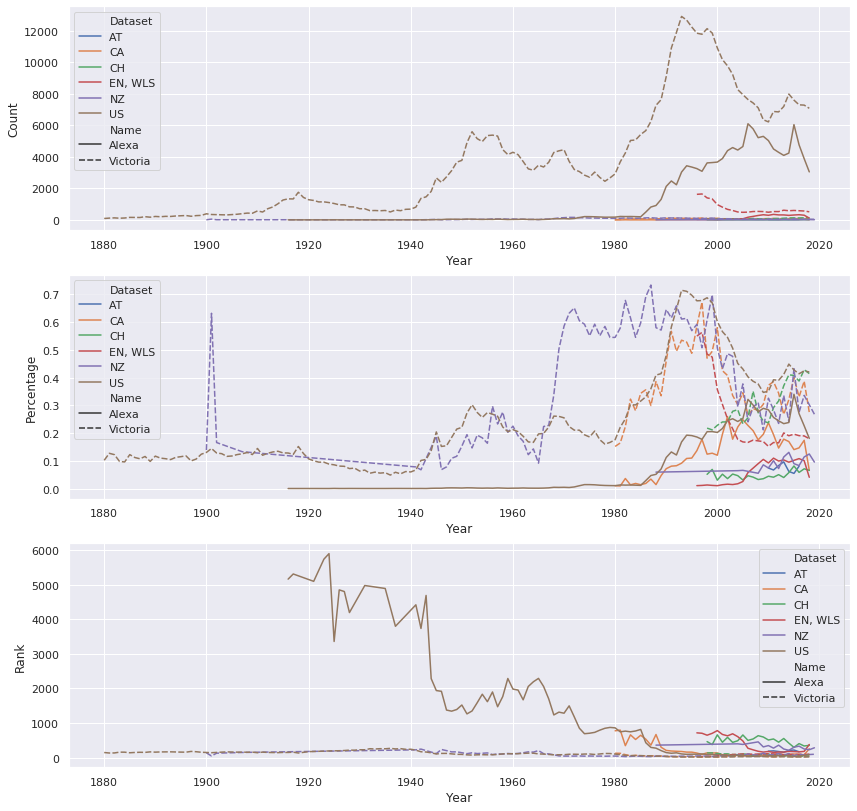

In [19]:
df_temp = df[(df["Name"].isin(["Alexa", "Victoria"])) & (df["Sex"] == "F")]

fig, ax = plt.subplots(3, 1, figsize=(14, 14))
sns.lineplot(x="Year", y="Count", hue="Dataset", style="Name", data=df_temp, ax=ax[0])
sns.lineplot(
    x="Year", y="Percentage", hue="Dataset", style="Name", data=df_temp, ax=ax[1]
)
sns.lineplot(x="Year", y="Rank", hue="Dataset", style="Name", data=df_temp, ax=ax[2]);

## Filter dataset

**Limiting to Name "Alexa":**

Because this is what we want to visualize here. Also dropping "Name" column, as the data now only contains a single name.

In [20]:
df_alexa = df[(df["Name"] == "Alexa") & (df["Sex"] == "F")]

# Also drop "Name", as everything is "Alexa" now:
df_alexa = df_alexa.drop(columns="Name")

df_alexa.head()

,Dataset,Year,Sex,Count,Rank,Percentage
62,AT,2010-01-01,F,27.0,188.0,0.074196
4625,AT,2011-01-01,F,24.0,196.0,0.067101
9122,AT,2012-01-01,F,30.0,178.0,0.083174
13608,AT,2013-01-01,F,35.0,155.0,0.096469
18142,AT,2014-01-01,F,23.0,208.0,0.061928


**Limiting to years since 1996:** 

We don't have complete dataset for all countries earlier, see Sanity Checks.

In [21]:
df_alexa = df_alexa[(df_alexa["Year"] >= "1998-01-01")]
df_alexa.head()

,Dataset,Year,Sex,Count,Rank,Percentage
62,AT,2010-01-01,F,27.0,188.0,0.074196
4625,AT,2011-01-01,F,24.0,196.0,0.067101
9122,AT,2012-01-01,F,30.0,178.0,0.083174
13608,AT,2013-01-01,F,35.0,155.0,0.096469
18142,AT,2014-01-01,F,23.0,208.0,0.061928


**TODO: Wrap whole preprocessing**

In [22]:
df[(df["Name"] == "Emma") & (df["Sex"] == "F") & (df["Dataset"] == "AT")]

,Dataset,Year,Sex,Name,Count,Rank,Percentage
687,AT,2010-01-01,F,Emma,494.0,14.0,1.357516
5243,AT,2011-01-01,F,Emma,603.0,11.0,1.685912
9731,AT,2012-01-01,F,Emma,613.0,9.0,1.699520
14233,AT,2013-01-01,F,Emma,688.0,8.0,1.896309
18769,AT,2014-01-01,F,Emma,705.0,8.0,1.898223
23489,AT,2015-01-01,F,Emma,829.0,6.0,2.166641
28359,AT,2016-01-01,F,Emma,808.0,6.0,2.037009


# Visualization

## Quick and dirty version

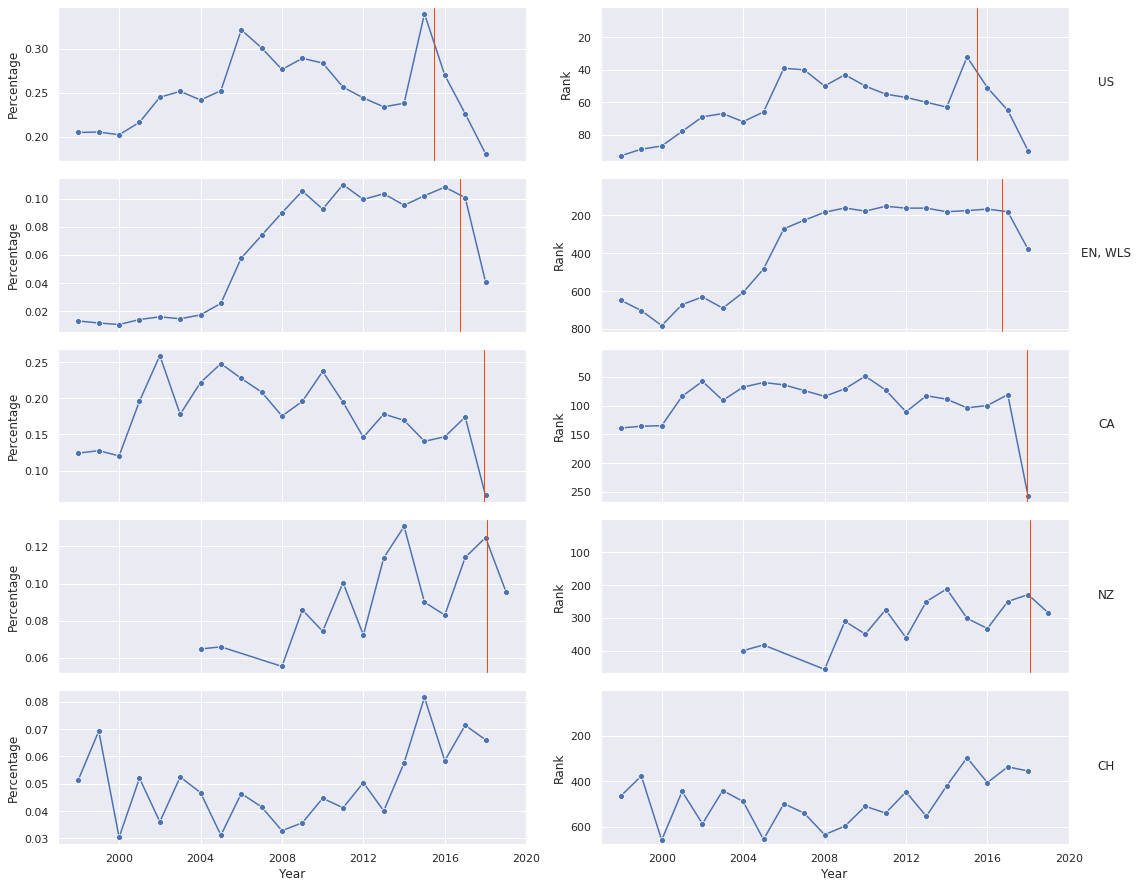

In [23]:
dataset_temp = sorted(DATASETS.items(), key=lambda kv: kv[1]["release"])
dataset_sorted = [d[0] for d in dataset_temp]
dataset_sorted.remove("AT")
datasets_count = len(dataset_sorted)

fig, ax = plt.subplots(
    datasets_count, 2, figsize=(16, datasets_count * 2.5), sharex=True
)

for idx, dataset in enumerate(dataset_sorted):
    df_alexa_dataset = df_alexa[df_alexa["Dataset"] == dataset]
    sns.lineplot(
        x="Year", y="Percentage", data=df_alexa_dataset, ax=ax[idx][0], marker="o"
    )

    sns.lineplot(
        x="Year", y="Rank", data=df_alexa_dataset, ax=ax[idx][1], marker="o"
    ).set_title(dataset, x=1.08, y=0.45)
    ax[idx][1].set_ylim(1,)
    ax[idx][1].invert_yaxis()
    ax[idx][1].set_xlim("1997-01-01", "2020-01-01")

    for ax_i in range(0, 2):
        if DATASETS[dataset]["release"]:
            ax[idx][ax_i].axvline(
                x=DATASETS[dataset]["release"], color="orangered", linewidth=1
            )
        else:
            ax[idx][ax_i].text(
                1,
                0.5,
                "Not yet released",
                color="orangered",
                horizontalalignment="center",
                verticalalignment="center",
                rotation=90,
                transform=ax[idx][ax_i].transAxes,
            )

fig.tight_layout()

In [24]:
df_alexa["Change"] = (
    df_alexa.sort_values("Year").groupby("Dataset")["Count"].pct_change()
)
df_alexa["Year_Str"] = df_alexa["Year"].dt.strftime("%Y")

df_alexa[df_alexa["Dataset"] == "NZ"]

,Dataset,Year,Sex,Count,Rank,Percentage,Change,Year_Str
751604,NZ,2004-01-01,F,11.0,399.0,0.064733,NaN,2004
752446,NZ,2005-01-01,F,11.0,382.0,0.065880,0.000000,2005
755006,NZ,2008-01-01,F,10.0,456.0,0.055346,-0.090909,2008
755913,NZ,2009-01-01,F,15.0,310.0,0.085793,0.500000,2009
756794,NZ,2010-01-01,F,13.0,349.0,0.074307,-0.133333,2010
757693,NZ,2011-01-01,F,17.0,275.0,0.100503,0.307692,2011
758580,NZ,2012-01-01,F,12.0,360.0,0.072259,-0.294118,2012
759445,NZ,2013-01-01,F,18.0,250.0,0.113917,0.500000,2013
760295,NZ,2014-01-01,F,20.0,212.0,0.130779,0.111111,2014
761124,NZ,2015-01-01,F,15.0,301.0,0.089987,-0.250000,2015


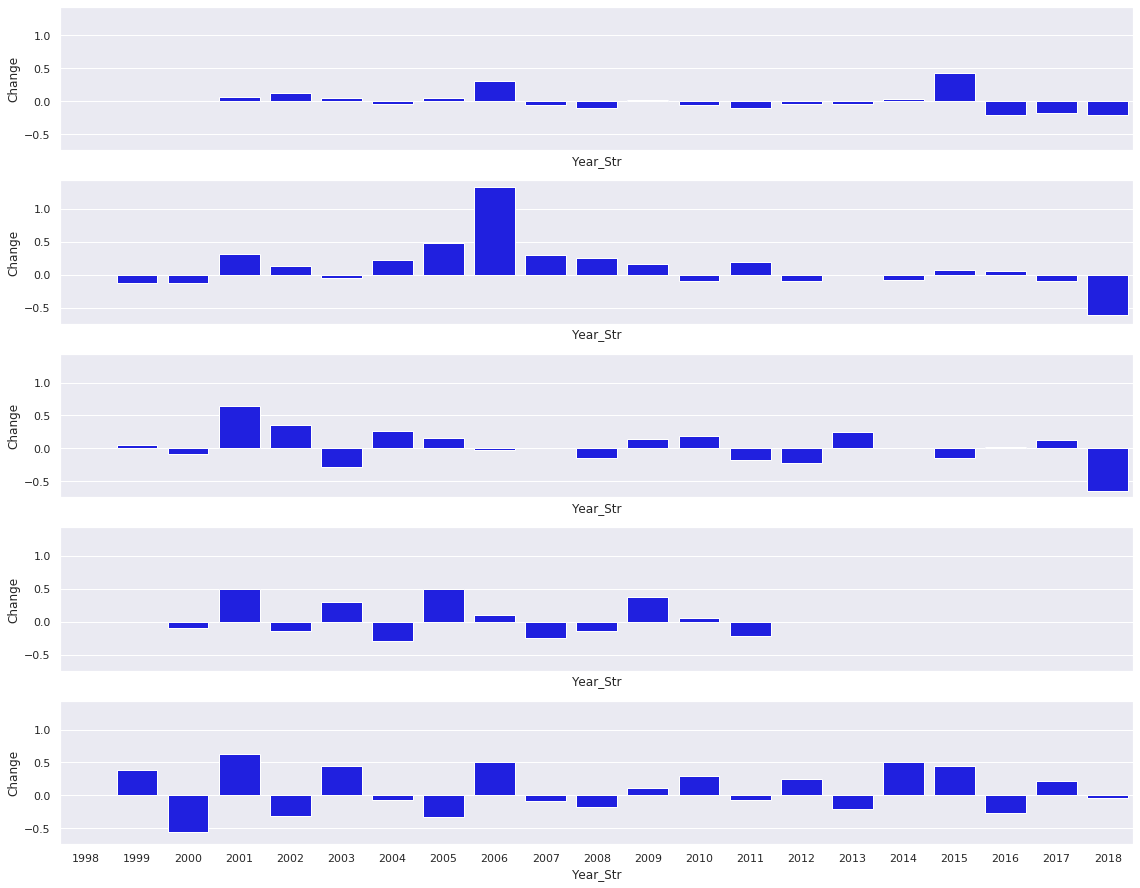

In [25]:
dataset_temp = sorted(DATASETS.items(), key=lambda kv: kv[1]["release"])
dataset_sorted = [d[0] for d in dataset_temp]
dataset_sorted.remove("AT")
datasets_count = len(dataset_sorted)

fig, ax = plt.subplots(
    datasets_count, 1, figsize=(16, datasets_count * 2.5), sharey=True, sharex=True
)

for idx, dataset in enumerate(dataset_sorted):
    df_alexa_dataset = df_alexa[df_alexa["Dataset"] == dataset]
    sns.barplot(
        x="Year_Str", y="Change", data=df_alexa_dataset, color="blue", ax=ax[idx]
    )

fig.tight_layout()

## Final Version

In [26]:
# Download "Assistant" Font, which is close to the Amazon Ember font but free
font_file = ASSETS_PATH / "assistant.ttf"
font_url = "https://github.com/hafontia/Assistant/blob/master/Fonts/TTF/Assistant-Regular.ttf?raw=true"
# -Bold, -SemiBold, -Light

if not font_file.exists():
    urllib.request.urlretrieve(font_url, font_file)
    print(f"Downloaded {font_file},")

In [27]:
# Prepare data
dataset_temp = sorted(DATASETS.items(), key=lambda kv: kv[1]["release"])
dataset_sorted = [d[0] for d in dataset_temp]
dataset_sorted.remove("AT")
# dataset_sorted.remove("CH")
datasets_count = len(dataset_sorted)

In [28]:
def add_text(ax):
    x_adjust = -0.05
    y_adjust = 0.04

    ax.grid(False)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax.patch.set_facecolor(CANVAS_COLOR)
    alexa_font_prop = font_manager.FontProperties(
        fname=str(font_file.resolve()), size=72
    )
    alexa_font_prop_small = font_manager.FontProperties(
        fname=str(font_file.resolve()), size=48
    )
    alexa_font_prop_tiny = font_manager.FontProperties(
        fname=str(font_file.resolve()), size=12
    )
    ax.text(
        0 + y_adjust,
        1 + x_adjust,
        "Hey            ,",
        # transform=plt.gcf().transFigure,
        fontproperties=alexa_font_prop,
        fontdict={
            "fontstretch": "condensed",
            "color": "white",
            "verticalalignment": "top",
        },
    )
    ax.text(
        0 + y_adjust,
        1 + x_adjust,
        "         Alexa",
        # transform=plt.gcf().transFigure,
        fontproperties=alexa_font_prop,
        fontdict={
            "fontstretch": "condensed",
            "color": ALEXA_BLUE,
            "verticalalignment": "top",
        },
    )
    ax.text(
        0 + y_adjust,
        1 + x_adjust - 0.18,
        "how many babys\nare named like you?",
        # transform=plt.gcf().transFigure,
        fontproperties=alexa_font_prop_small,
        fontdict={
            "fontstretch": "condensed",
            "color": "white",
            "verticalalignment": "top",
        },
    )

    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return

In [29]:
def add_echo(ax):
    img = plt.imread("/home/jovyan/notebooks/assets/alexa/echo_200.png")
    ax.figure.figimage(img, 120, 60, zorder=1, resize=False)

In [30]:
def plot_dataset(dataset, ax):
    df_alexa_dataset = df_alexa[df_alexa["Dataset"] == dataset]

    ax.plot(
        df_alexa_dataset["Year"], df_alexa_dataset["Rank"], color="white", marker="o"
    )
    ax.patch.set_facecolor(BG_COLOR)

    if dataset == "CH":
        white_line = plt.Line2D(
            (0, 1), (0, 0), color="white", marker="o", label="Rank of baby name 'Alexa'"
        )
        blue_line = plt.Line2D(
            (0, 1), (0, 0), color=ALEXA_BLUE, label="Release of Amazon Alexa"
        )
        legend = plt.legend(
            handles=[white_line, blue_line],
            loc="upper center",
            fancybox=True,
            facecolor=BG_COLOR,
            edgecolor="#3c4043",
            ncol=2,
            bbox_to_anchor=(0.5, -0.25),
        )
        plt.setp(legend.get_texts(), color="w")

    # Axes
    ax.set_ylim(0,)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xlim("1997-01-01", "2020-01-01")
    ax.set_ylabel(
        f"{DATASETS[dataset]['description']}", color="white", labelpad=10, size=16
    )
    ax.set_xlabel("")

    # Grid lines
    ax.grid(b=True, which="major", color="#3c4043", linestyle="-")
    ax.spines["bottom"].set_color(BG_COLOR)
    ax.spines["left"].set_color("white")
    ax.spines["top"].set_color("white")
    ax.spines["right"].set_color(BG_COLOR)

    # Texts
    ax.tick_params(colors="white")
    # ax.xaxis.set_tick_params(labeltop='on')

    if DATASETS[dataset]["release"] < datetime.date(2020, 1, 1):
        ax.axvline(x=DATASETS[dataset]["release"], color=ALEXA_BLUE, linewidth=1)
        text = DATASETS[dataset]["release"]
        pos = (40, -15)
    else:
        text = "not released"
        pos = (0, -15)

    ax.annotate(
        s=text,
        xy=(DATASETS[dataset]["release"], max(df_alexa_dataset["Rank"])),
        xytext=pos,
        color=ALEXA_BLUE,
        horizontalalignment="center",
        verticalalignment="center",
        weight="bold",
        textcoords="offset points",
    )
    return ax

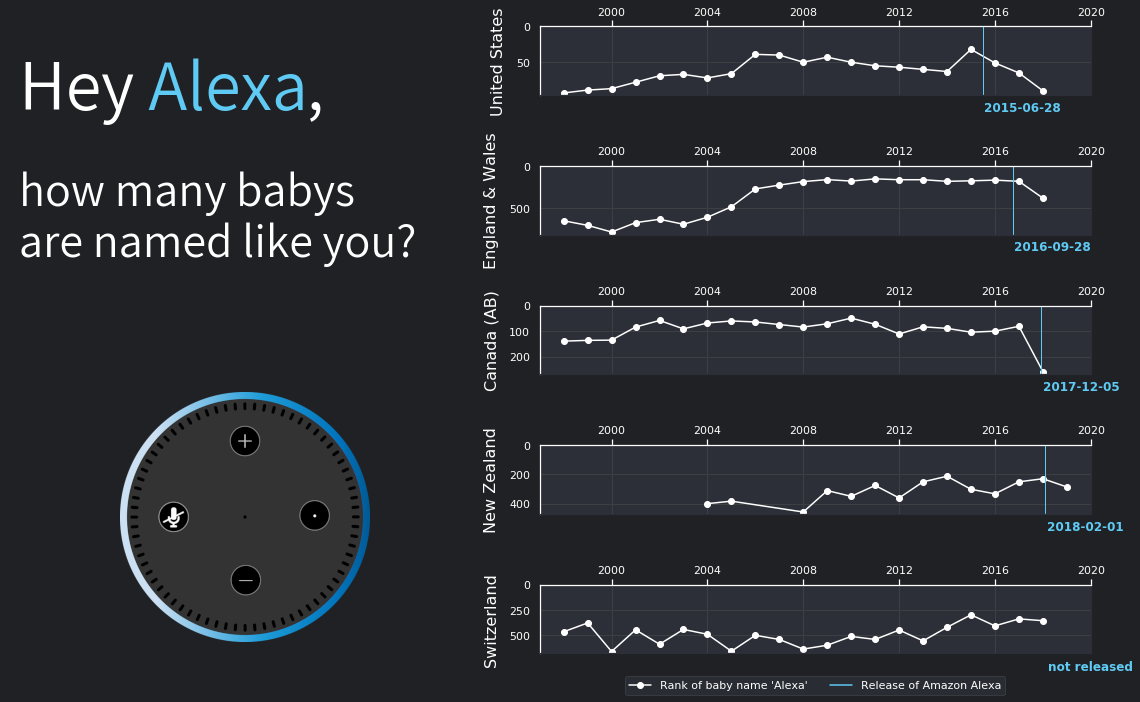

In [31]:
ALEXA_BLUE = "#5fcaf4"
BG_COLOR = "#2c2f38"
CANVAS_COLOR = "#202124"

fig = plt.figure(figsize=(16, 10))
fig.patch.set_facecolor(CANVAS_COLOR)

# Plot main plot
gs = fig.add_gridspec(datasets_count, 5)

ax_text = fig.add_subplot(gs[:, :2])
add_text(ax_text)
add_echo(ax_text)

fig_axes = []
for idx, dataset in enumerate(dataset_sorted):
    ax_temp = fig.add_subplot(gs[idx, 2:])
    plot_dataset(dataset, ax_temp)
    fig_axes.append(ax_temp)

fig.tight_layout(h_pad=2.5, w_pad=10);

In [32]:
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

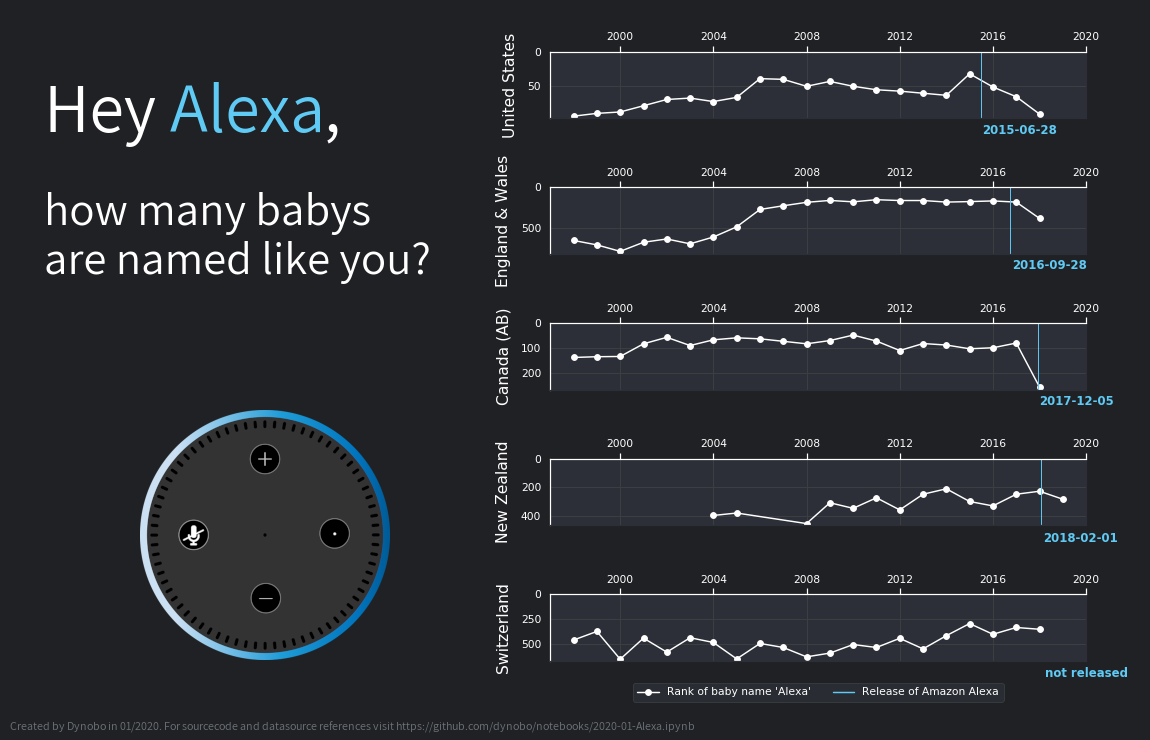

In [33]:
# Add padding
buf = io.BytesIO()
fig.savefig(buf, format="png", dpi=70, facecolor=CANVAS_COLOR)
buf.seek(0)
im = Image.open(buf)
im = add_margin(im, 20, 10, 20, 20, CANVAS_COLOR)

width, height = im.size

draw = ImageDraw.Draw(im)
font = ImageFont.truetype(str(font_file.resolve()), size=12)
draw.text((10, height-22), "Created by Dynobo in 01/2020. For sourcecode and datasource references visit https://github.com/dynobo/notebooks/2020-01-Alexa.ipynb", fill="#6C7378", font=font)

display(im)
buf.close()